## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 1

## 2. Use the MountainCar-v0 environment and write a program to : 
### a. Implement the CartPole environment for a certain number of steps 
### b. Implement the CartPole environment for a certain number of episodes 
### c. Compare and comment on the rewards earned for both approaches. 
### d. Plot the cumulative reward of the games and note down the results. 

In [17]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [18]:
env = gym.make("MountainCar-v0", render_mode="human", goal_velocity=0.1)

In [19]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>

In [20]:
obs_space = env.observation_space
action_space = env.action_space

print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [21]:
state, info = env.reset(seed=123, options={"x_init": np.pi/2, "y_init": 0.5})
# state, info = env.reset()

print("The initial state is {}".format(state))

The initial state is [-0.46352962  0.        ]


In [22]:
num_steps = 100
total_reward_steps = 0
cumulative_rewards_steps = []

done = False
for step in range(num_steps):
    random_action = env.action_space.sample()
    new_obs, reward, terminated, truncated, info = env.step(random_action)
    
    total_reward_steps += reward
    cumulative_rewards_steps.append(total_reward_steps)
    
    if terminated or truncated:
        print(f"Episode finished after {step+1} steps.")
        state, info = env.reset()

In [23]:
print(f"Total reward for {num_steps} steps approach: {total_reward_steps}")

env.close()

Total reward for 100 steps approach: -100.0


In [24]:
env = gym.make("MountainCar-v0", render_mode="human", goal_velocity=0.1)

In [25]:
num_episodes = 10
total_reward_episodes = 0
cumulative_rewards_episodes = []

for episode in range(num_episodes):
    state, info = env.reset()
    
    done = False
    steps_in_episode = 0
    episode_reward = 0
    
    while not done:
        random_action = env.action_space.sample()
        new_obs, reward, terminated, truncated, info = env.step(random_action)
        
        episode_reward += reward
        steps_in_episode += 1

        if terminated or truncated:
            print(f"Episode {episode + 1} finished after {steps_in_episode} steps.")
            break
        
    total_reward_episodes += episode_reward
    cumulative_rewards_episodes.append(total_reward_episodes)

Episode 1 finished after 200 steps.
Episode 2 finished after 200 steps.
Episode 3 finished after 200 steps.
Episode 4 finished after 200 steps.
Episode 5 finished after 200 steps.
Episode 6 finished after 200 steps.
Episode 7 finished after 200 steps.
Episode 8 finished after 200 steps.
Episode 9 finished after 200 steps.
Episode 10 finished after 200 steps.


In [26]:
print(f"Total reward for {num_episodes} episodes approach: {total_reward_episodes}")

env.close()

Total reward for 10 episodes approach: -2000.0


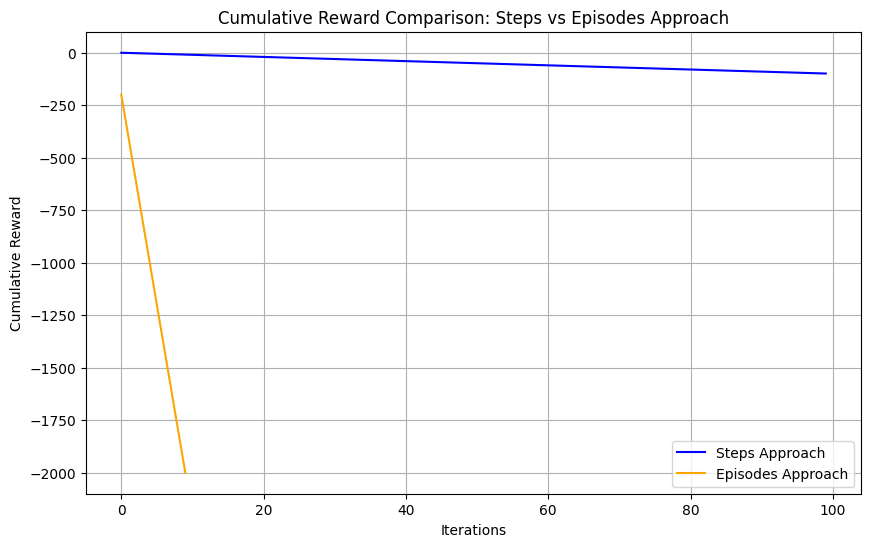

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(range(num_steps), cumulative_rewards_steps, label="Steps Approach", color='blue')
plt.plot(range(num_episodes), cumulative_rewards_episodes, label="Episodes Approach", color='orange')

plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison: Steps vs Episodes Approach")
plt.legend()

plt.grid(True)
plt.show()